<a href="https://colab.research.google.com/github/blowmeaway1234/Artificial-Intelligence/blob/main/Midterm_Recognition_Class_Member_build_with_ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load dataset Class Member 

In [93]:
!ls gdrive/MyDrive/DataSetMember # test data 

testing.zip  trainingSet.zip


In [94]:
# Unzip Test and Train data
! unzip gdrive/MyDrive/DataSetMember/testing.zip
! unzip gdrive/MyDrive/DataSetMember/trainingSet.zip

Archive:  gdrive/MyDrive/DataSetMember/testing.zip
replace testing/Hy (21).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: testing/Hy (21).jpg     
  inflating: testing/Hy (25).jpg     
  inflating: testing/Hy (28).jpg     
  inflating: testing/Hy (31).jpg     
  inflating: testing/Hy (43).jpg     
  inflating: testing/Hy (45).jpg     
  inflating: testing/Hy (5).jpg      
  inflating: testing/Hy (52).jpg     
  inflating: testing/Hy (57).jpg     
  inflating: testing/Hy (7).jpg      
  inflating: testing/Khiet (1).jpg   
 extracting: testing/Khiet (28).jpg  
 extracting: testing/Khiet (33).jpg  
 extracting: testing/Khiet (37).jpg  
 extracting: testing/Khiet (39).jpg  
 extracting: testing/Khiet (41).jpg  
 extracting: testing/Khiet (43).jpg  
 extracting: testing/Khiet (51).jpg  
 extracting: testing/Khiet (53).jpg  
 extracting: testing/Khiet (57).jpg  
  inflating: testing/Kiet (1).jpg    
  inflating: testing/Kiet (13).jpg   
  inflating: testing/Kiet (20).jpg   
  infl

In [95]:
# Check traindata
for i in range(10): # lệnh !ls không hiểu python nên ko dùng '{}'.format i
    !ls trainingSet/{i}| wc -l

60
60
60
60
60
60
60
60
60
60


In [96]:
# Check testdata
!ls testing/| wc -l

80


In [97]:
!ls trainingSet/| wc -l

10


# Preprocessing Data

In [222]:
import tensorflow as tf
from pathlib import Path

In [223]:
train_root = Path('trainingSet/')
testing_root=Path('testing/')
# convert to string type
filelist_ds= tf.data.Dataset.list_files(str(train_root/'*/*')) # 2 level scan (train_root to folders 0 - 9 then access each one)
test_list = tf.data.Dataset.list_files(str(testing_root/'*'))
# 9 random elements
for file in filelist_ds.take(8):
  print(file) #filename path in tf.data
for file in test_list.take(8):
  print(file) #filename path in tf.data

tf.Tensor(b'trainingSet/9/Danh (29).jpg', shape=(), dtype=string)
tf.Tensor(b'trainingSet/3/Long (45).jpg', shape=(), dtype=string)
tf.Tensor(b'trainingSet/3/Long (35).jpg', shape=(), dtype=string)
tf.Tensor(b'trainingSet/0/Hy (54).jpg', shape=(), dtype=string)
tf.Tensor(b'trainingSet/4/Minh (5).jpg', shape=(), dtype=string)
tf.Tensor(b'trainingSet/0/Hy (60).jpg', shape=(), dtype=string)
tf.Tensor(b'trainingSet/2/Kiet (49).jpg', shape=(), dtype=string)
tf.Tensor(b'trainingSet/7/Truc (32).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Khiet (37).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Khiet (51).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Long (46).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Khiet (57).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Hy (31).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Kiet (52).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Thang (60).jpg', shape=(), dtype=string)
tf.Tensor(b'testing/Minh (45).jpg', shape=(), dtype=str

In [224]:
def get_label(file_path):
  parts = tf.strings.split(file_path, '/')
  #part[0] = train
  #part[1] = 0/1.../9
  #part[2] = filename
  if parts[-2] == "0":
    labels=[1,0,0,0,0,0,0,0,0,0]
  elif parts[-2] == "1":
    labels=[0,1,0,0,0,0,0,0,0,0]
  elif parts[-2] == "2":
    labels=[0,0,1,0,0,0,0,0,0,0]
  elif parts[-2] == "3":
    labels=[0,0,0,1,0,0,0,0,0,0]
  elif parts[-2] == "4":
    labels=[0,0,0,0,1,0,0,0,0,0]
  elif parts[-2] == "5":
    labels=[0,0,0,0,0,1,0,0,0,0]
  elif parts[-2] == "6":
    labels=[0,0,0,0,0,0,1,0,0,0]
  elif parts[-2] == "7":
    labels=[0,0,0,0,0,0,0,1,0,0]
  elif parts[-2] == "8":
    labels=[0,0,0,0,0,0,0,0,1,0]
  else:
    labels=[0,0,0,0,0,0,0,0,0,1]
    #return labels value but have to convert to tensor becase string we use is python not tf.tensor
  return tf.convert_to_tensor(labels) 
# Test
for file in filelist_ds.take(8):
  print('filename',file.numpy().decode('utf-8')) # utf8 bỏ tf.tensor
  print('label:',get_label(file).numpy())

filename trainingSet/0/Hy (14).jpg
label: [1 0 0 0 0 0 0 0 0 0]
filename trainingSet/3/Long (34).jpg
label: [0 0 0 1 0 0 0 0 0 0]
filename trainingSet/2/Kiet (26).jpg
label: [0 0 1 0 0 0 0 0 0 0]
filename trainingSet/6/Thang (6).jpg
label: [0 0 0 0 0 0 1 0 0 0]
filename trainingSet/7/Truc (46).jpg
label: [0 0 0 0 0 0 0 1 0 0]
filename trainingSet/5/Tan (35).jpg
label: [0 0 0 0 0 1 0 0 0 0]
filename trainingSet/5/Tan (29).jpg
label: [0 0 0 0 0 1 0 0 0 0]
filename trainingSet/7/Truc (51).jpg
label: [0 0 0 0 0 0 0 1 0 0]


In [225]:
from tensorflow._api.v2 import image
# Preprocessing function
img_height = 30
img_width = 40
def preprocessing(file_path): #data we have just a file list but data for train model must be pixel value
  # Read file
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img,channels=3) # 1 is gray, 3 is color; we use image function of tf.image ; jpeg because jpg is our flie
  # Transform
    # Conver from uint 8 to float 32 and Normalize value to [0,1]
  img = tf.image.convert_image_dtype(img,tf.float32)
    # Resize
  img = tf.image.resize(img,[img_width,img_height])
    # Get image label
  label = get_label(file_path)
  # Return
  print(img.shape)
  return img, label

# Build Model

In [226]:
import tensorflow as tf
from tensorflow.keras import layers
#build model
model = tf.keras.Sequential()
inputs = tf.keras.Input(shape=(img_width,img_height,3))
x = layers.Conv2D(10,5,strides=(1,1),padding = 'valid',activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Conv2D(20,5,strides=(1,1),padding='valid',activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(100,activation='relu')(x)
output = layers.Dense(10, activation ='softmax')(x)

model = tf.keras.Model(inputs=inputs,outputs=output)
model.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 40, 30, 3)]       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 36, 26, 10)        760       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 18, 13, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 9, 20)         5020      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 7, 4, 20)         0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 7, 4, 20)          0  

In [227]:
ds_size = 25000 #(shuffle size) 
# Set parameter
batch_size = 16
# Build data
train_ds = filelist_ds.shuffle(ds_size) # Shuffling the input and it doesn't have labels
train_ds = train_ds.map(preprocessing,num_parallel_calls=tf.data.AUTOTUNE) # Process each element + get labels => train_ds = pixel val and labels
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(8) # chia luồn data

(40, 30, 3)


# Compile and training model

In [228]:
# Compile model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=["accuracy"] #caculate accuracy on each batch
)

In [229]:
# Train model
model.fit(train_ds, epochs = 10)

Epoch 1/5
19/19 [==============================] - 2s 7ms/step - loss: 2.1666 - accuracy: 0.2817
Epoch 2/5
19/19 [==============================] - 0s 10ms/step - loss: 1.2075 - accuracy: 0.7183
Epoch 3/5
19/19 [==============================] - 0s 10ms/step - loss: 0.4028 - accuracy: 0.8750
Epoch 4/5
19/19 [==============================] - 0s 12ms/step - loss: 0.1808 - accuracy: 0.9500
Epoch 5/5
19/19 [==============================] - 0s 10ms/step - loss: 0.1465 - accuracy: 0.9567


In [230]:
model.save('ClassMemberANNmodel.h5')

1/1 [==============================] - 0s 32ms/step


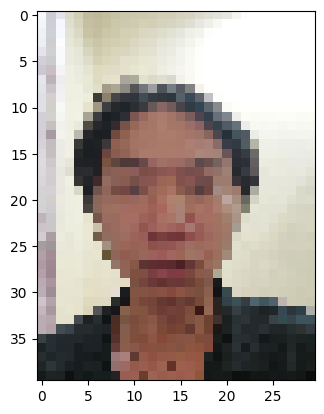

Thắng
1/1 [==============================] - 0s 49ms/step


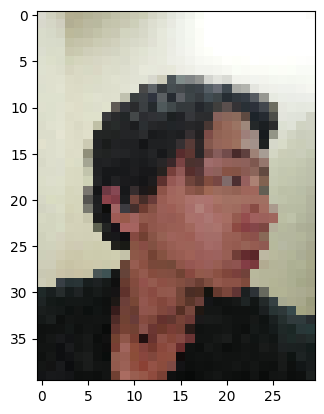

Thắng
1/1 [==============================] - 0s 34ms/step


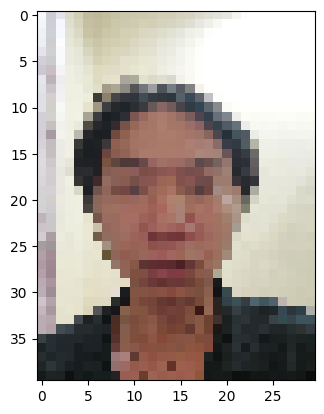

Thắng
1/1 [==============================] - 0s 21ms/step


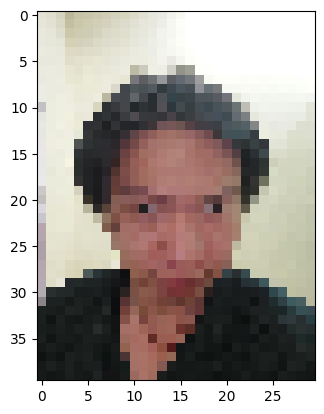

Thắng
1/1 [==============================] - 0s 20ms/step


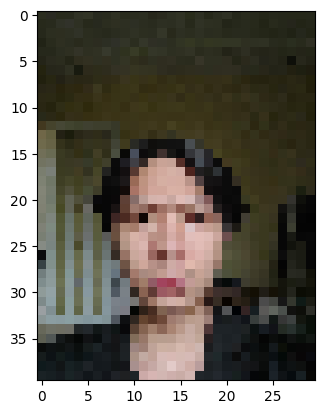

Danh
1/1 [==============================] - 0s 20ms/step


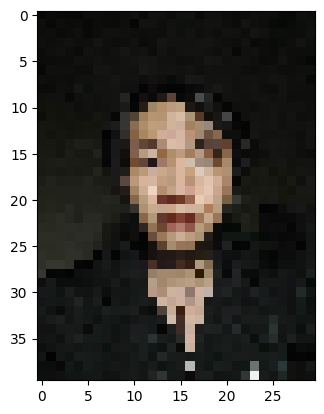

Danh
1/1 [==============================] - 0s 19ms/step


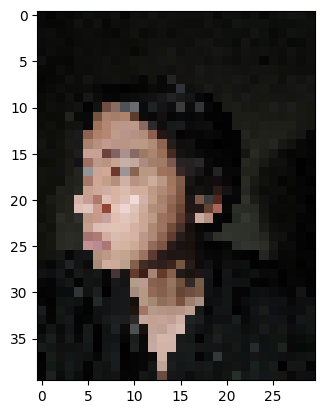

Danh
1/1 [==============================] - 0s 19ms/step


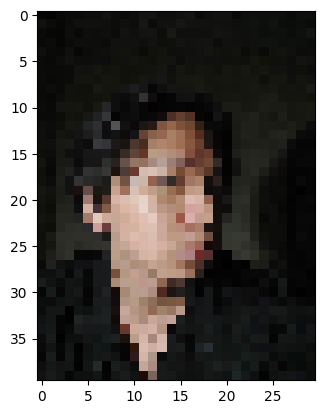

Danh
1/1 [==============================] - 0s 20ms/step


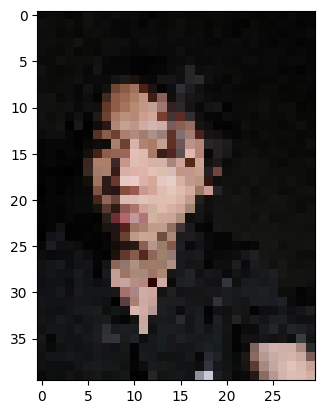

Trúc


In [247]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

name = {0: 'Hy', 1: 'Khiết', 2: 'Kiệt', 3: 'Long', 4: 'Minh', 5: 'Tấn', 6: 'Thắng', 7: 'Trúc', 8: 'Điển', 9: 'Danh'}
# Load 10 picture to scan the image
for i in range(9):
    img = load_img("Danh{i}.jpg".format(i=i), target_size=(40, 30))
    plt.imshow(img)
    img = img_to_array(img)
    img = img.reshape(1, 40, 30, 3)
    img = img.astype('float32')
    img = img / 255
    result = np.argmax(model.predict(img), axis=1)
    plt.show()
    print(name[result[0]])
